In [1]:
%load_ext autoreload
%autoreload 2

簡易的にパスを設定.

In [42]:
import sys
import os
import pytz
from datetime import datetime
from IPython.display import display
from IPython.display import Image as displayImage

sys.path.append('../')
from strategies.candles.ftx_candle_generator import FtxCandleGenerator
from strategies.generator import PnlCalculator, StrategiesImageGenerator
from strategies.logics import StrategiesLogics


# リソース.

In [46]:
root_dir = os.getcwd() + "/../"
product_dir = root_dir + "products/"
resource_dir = root_dir + "resources/"
csv_dir = resource_dir + "csv/"
logic_dir = resource_dir + "logics/"
image_dir = resource_dir + "images/"


# CSV作成.

## OHLCV作成.

In [23]:
start_timestamp = datetime(2021, 1, 1, tzinfo=pytz.UTC).timestamp()
end_timestamp = datetime(2021, 7, 1, tzinfo=pytz.UTC).timestamp()
candle_generator = FtxCandleGenerator("BTC-PERP", start_timestamp, end_timestamp)
candles = candle_generator.generate()
candles


,o,h,l,c,v
ts,,,,,
1.609459e+09,28956.0,29080.0,28731.5,29045.5,7.721627e+07
1.609463e+09,29045.5,29562.5,29006.0,29474.0,1.597047e+08
1.609466e+09,29474.0,29531.0,29156.0,29256.5,7.726872e+07
1.609470e+09,29256.5,29430.0,29189.0,29343.5,4.500972e+07
1.609474e+09,29343.5,29473.5,29123.0,29287.5,5.571965e+07
...,...,...,...,...,...
1.625080e+09,34825.0,34850.0,34671.0,34763.0,5.343424e+07
1.625083e+09,34760.0,35115.0,34378.0,34586.0,1.550307e+08
1.625087e+09,34586.0,35028.0,34586.0,34811.0,9.603207e+07


## PNL計算.

### ロジックNo. 0

In [26]:
logic_no = 0
logic = StrategiesLogics.create_logic(f"{logic_dir}{logic_no}.txt")
result = PnlCalculator.calculate(candle_generator, logic)
result

,o,h,l,c,v,signal,position,entry_price,exit_price,pnl,tmp_pnl,balance
ts,,,,,,,,,,,,
1.609459e+09,28956.0,29080.0,28731.5,29045.5,7.721627e+07,1,0.0,28956.0,29045.5,0.000000,0.000000,0.000000
1.609463e+09,29045.5,29562.5,29006.0,29474.0,1.597047e+08,1,1.0,29045.5,NaN,0.000000,0.014753,0.014753
1.609466e+09,29474.0,29531.0,29156.0,29256.5,7.726872e+07,1,1.0,29045.5,NaN,0.000000,0.007264,0.007264
1.609470e+09,29256.5,29430.0,29189.0,29343.5,4.500972e+07,1,1.0,29045.5,NaN,0.000000,0.010260,0.010260
1.609474e+09,29343.5,29473.5,29123.0,29287.5,5.571965e+07,1,1.0,29045.5,NaN,0.000000,0.008332,0.008332
...,...,...,...,...,...,...,...,...,...,...,...,...
1.625080e+09,34825.0,34850.0,34671.0,34763.0,5.343424e+07,1,1.0,29045.5,NaN,0.000000,0.196846,0.196846
1.625083e+09,34760.0,35115.0,34378.0,34586.0,1.550307e+08,1,1.0,29045.5,NaN,0.000000,0.190752,0.190752
1.625087e+09,34586.0,35028.0,34586.0,34811.0,9.603207e+07,1,1.0,29045.5,NaN,0.000000,0.198499,0.198499


### CSV出力.

In [27]:
result[["balance"]].to_csv(f"{csv_dir}{logic_no}.csv")

# 画像生成.

In [33]:
generator = StrategiesImageGenerator(root_dir, candle_generator)
generator.prepare()


In [41]:
generator.generate_image(0)


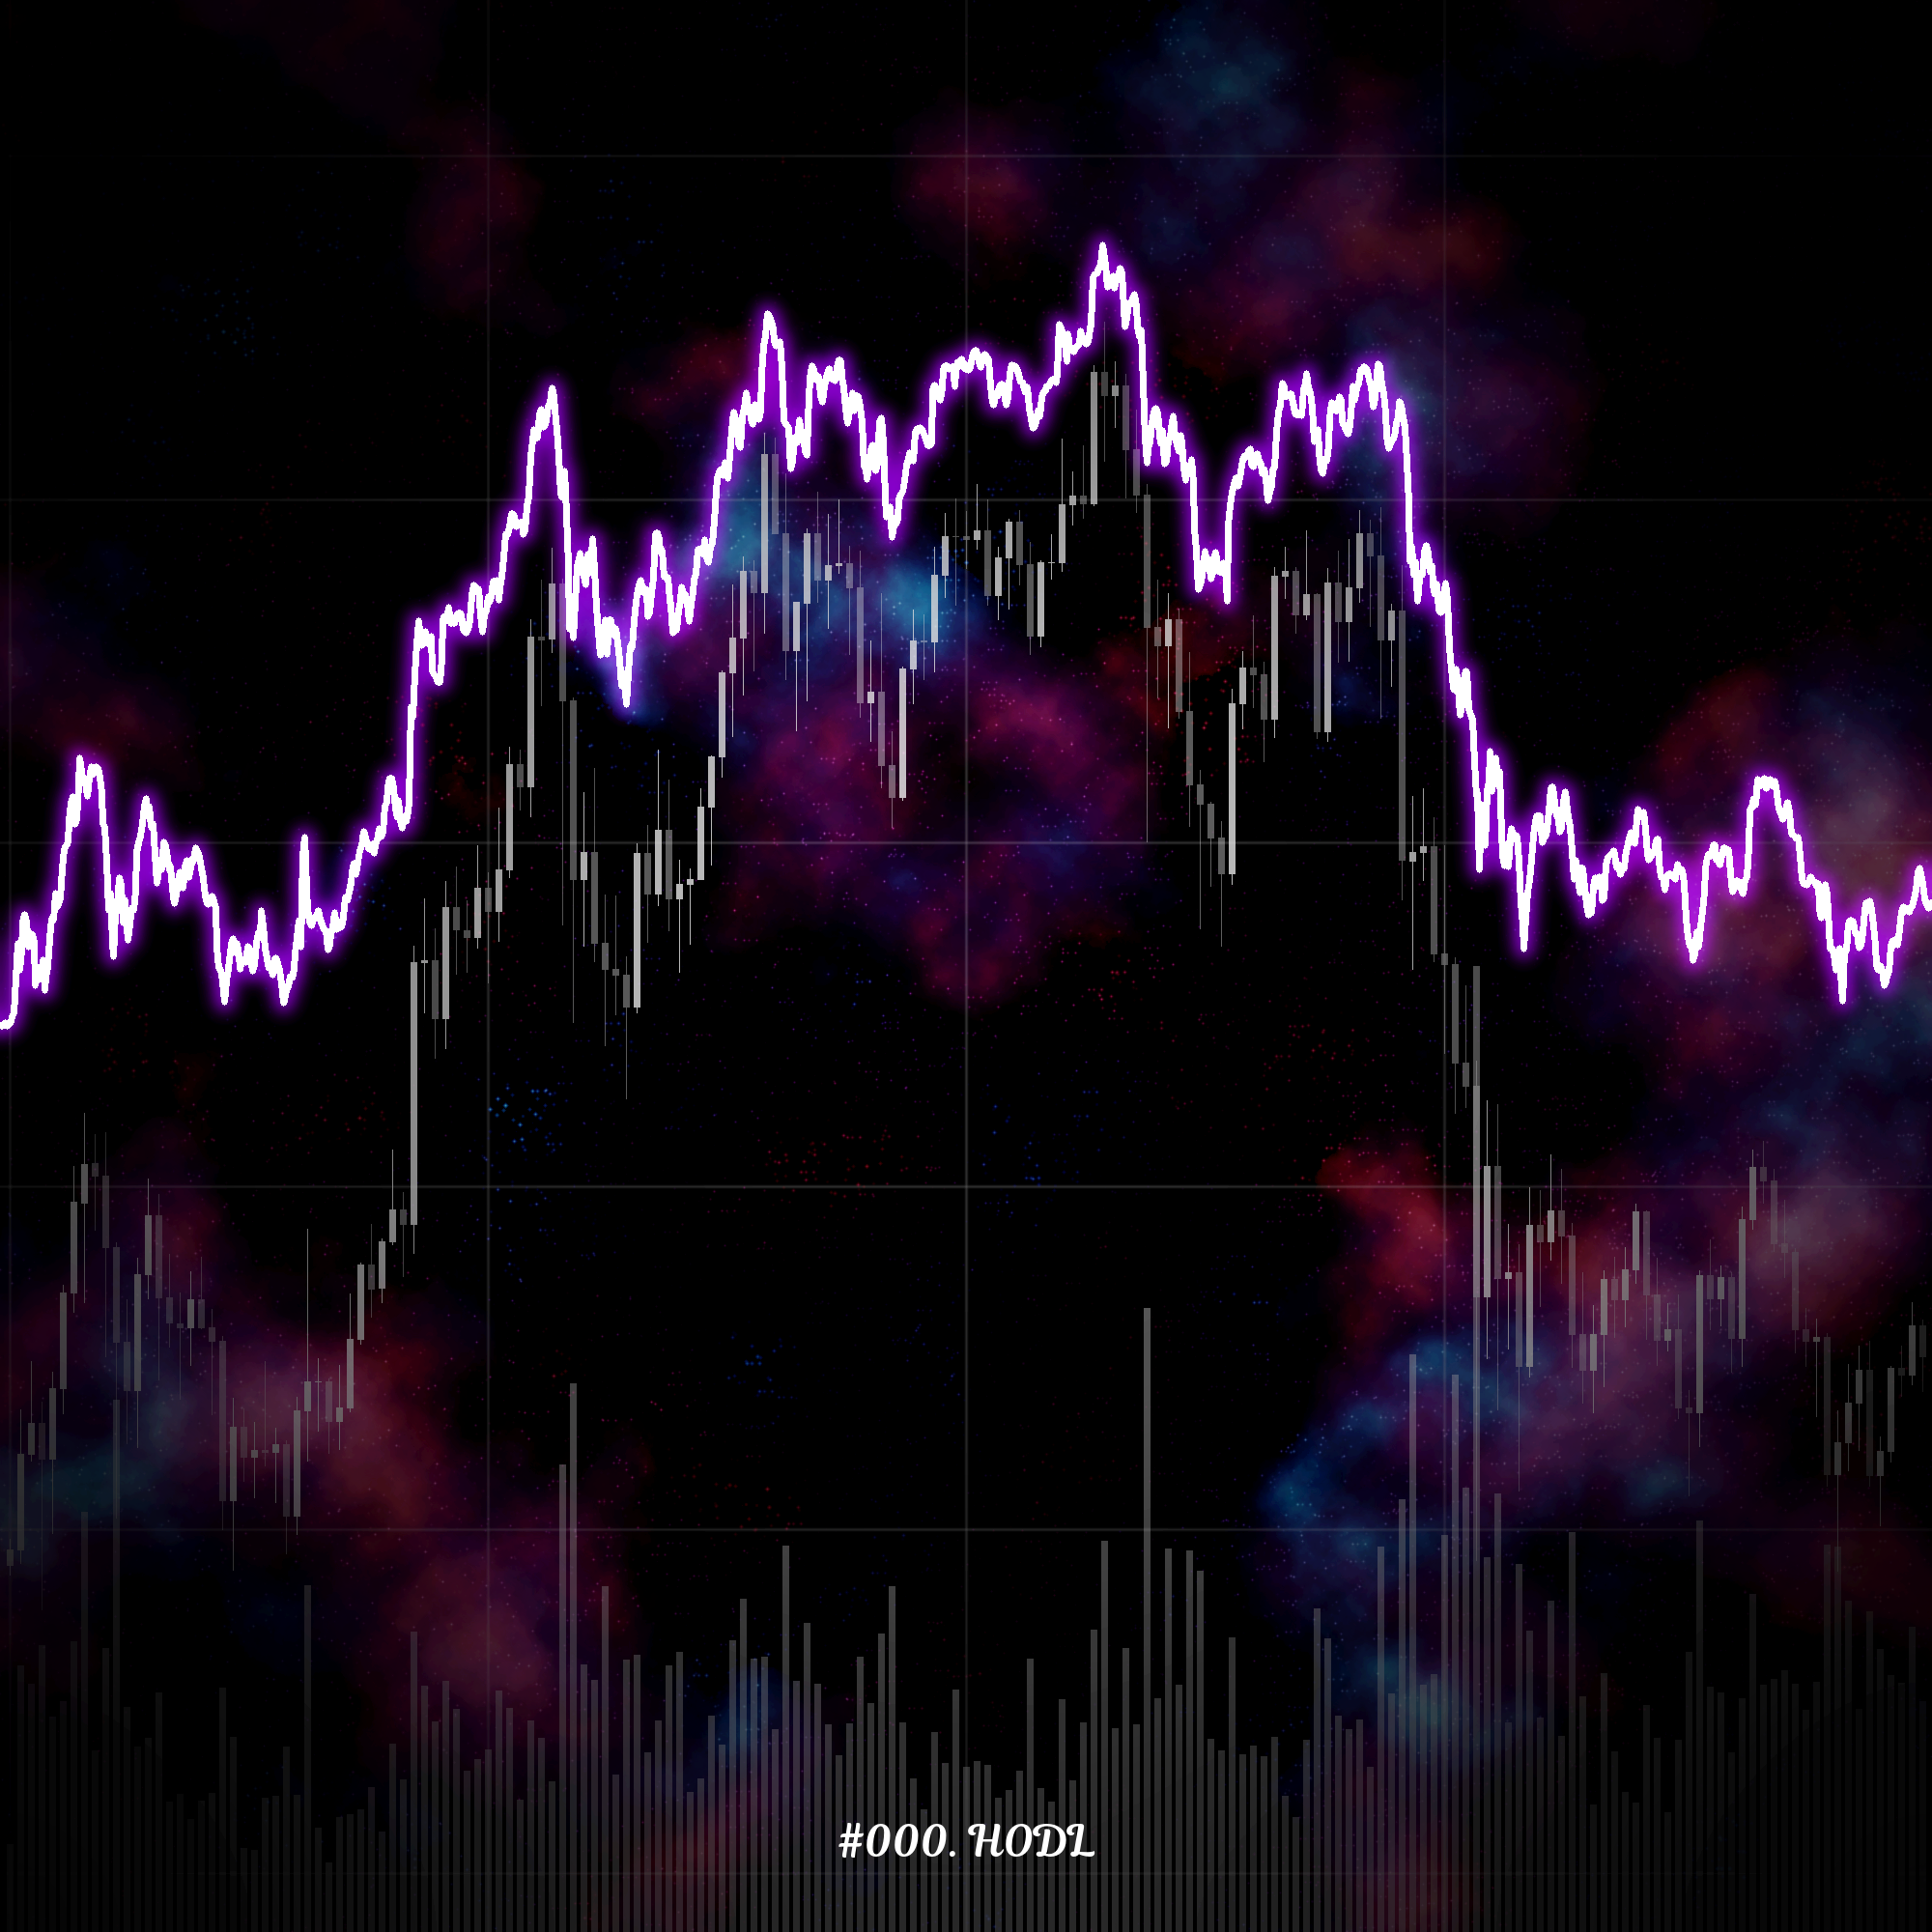

In [47]:
displayImage(product_dir+"strategies_000.png")